In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
dataset = pd.read_csv(r"C:\Users\ASUS\Downloads\WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [9]:
dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [10]:
dataset.drop(['customerID'], axis=1, inplace = True)

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [12]:
dataset.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [13]:
dataset.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

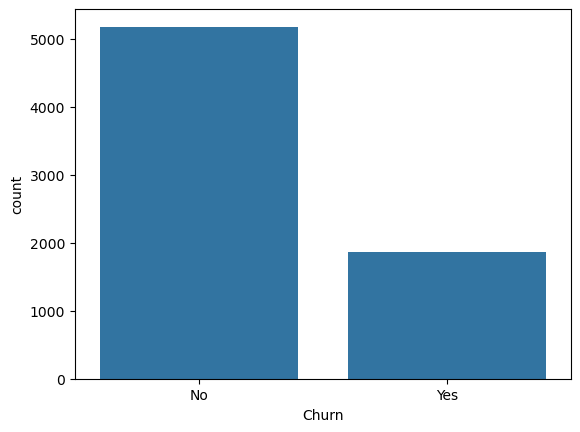

In [15]:
sns.countplot(data = dataset, x='Churn')
plt.show()

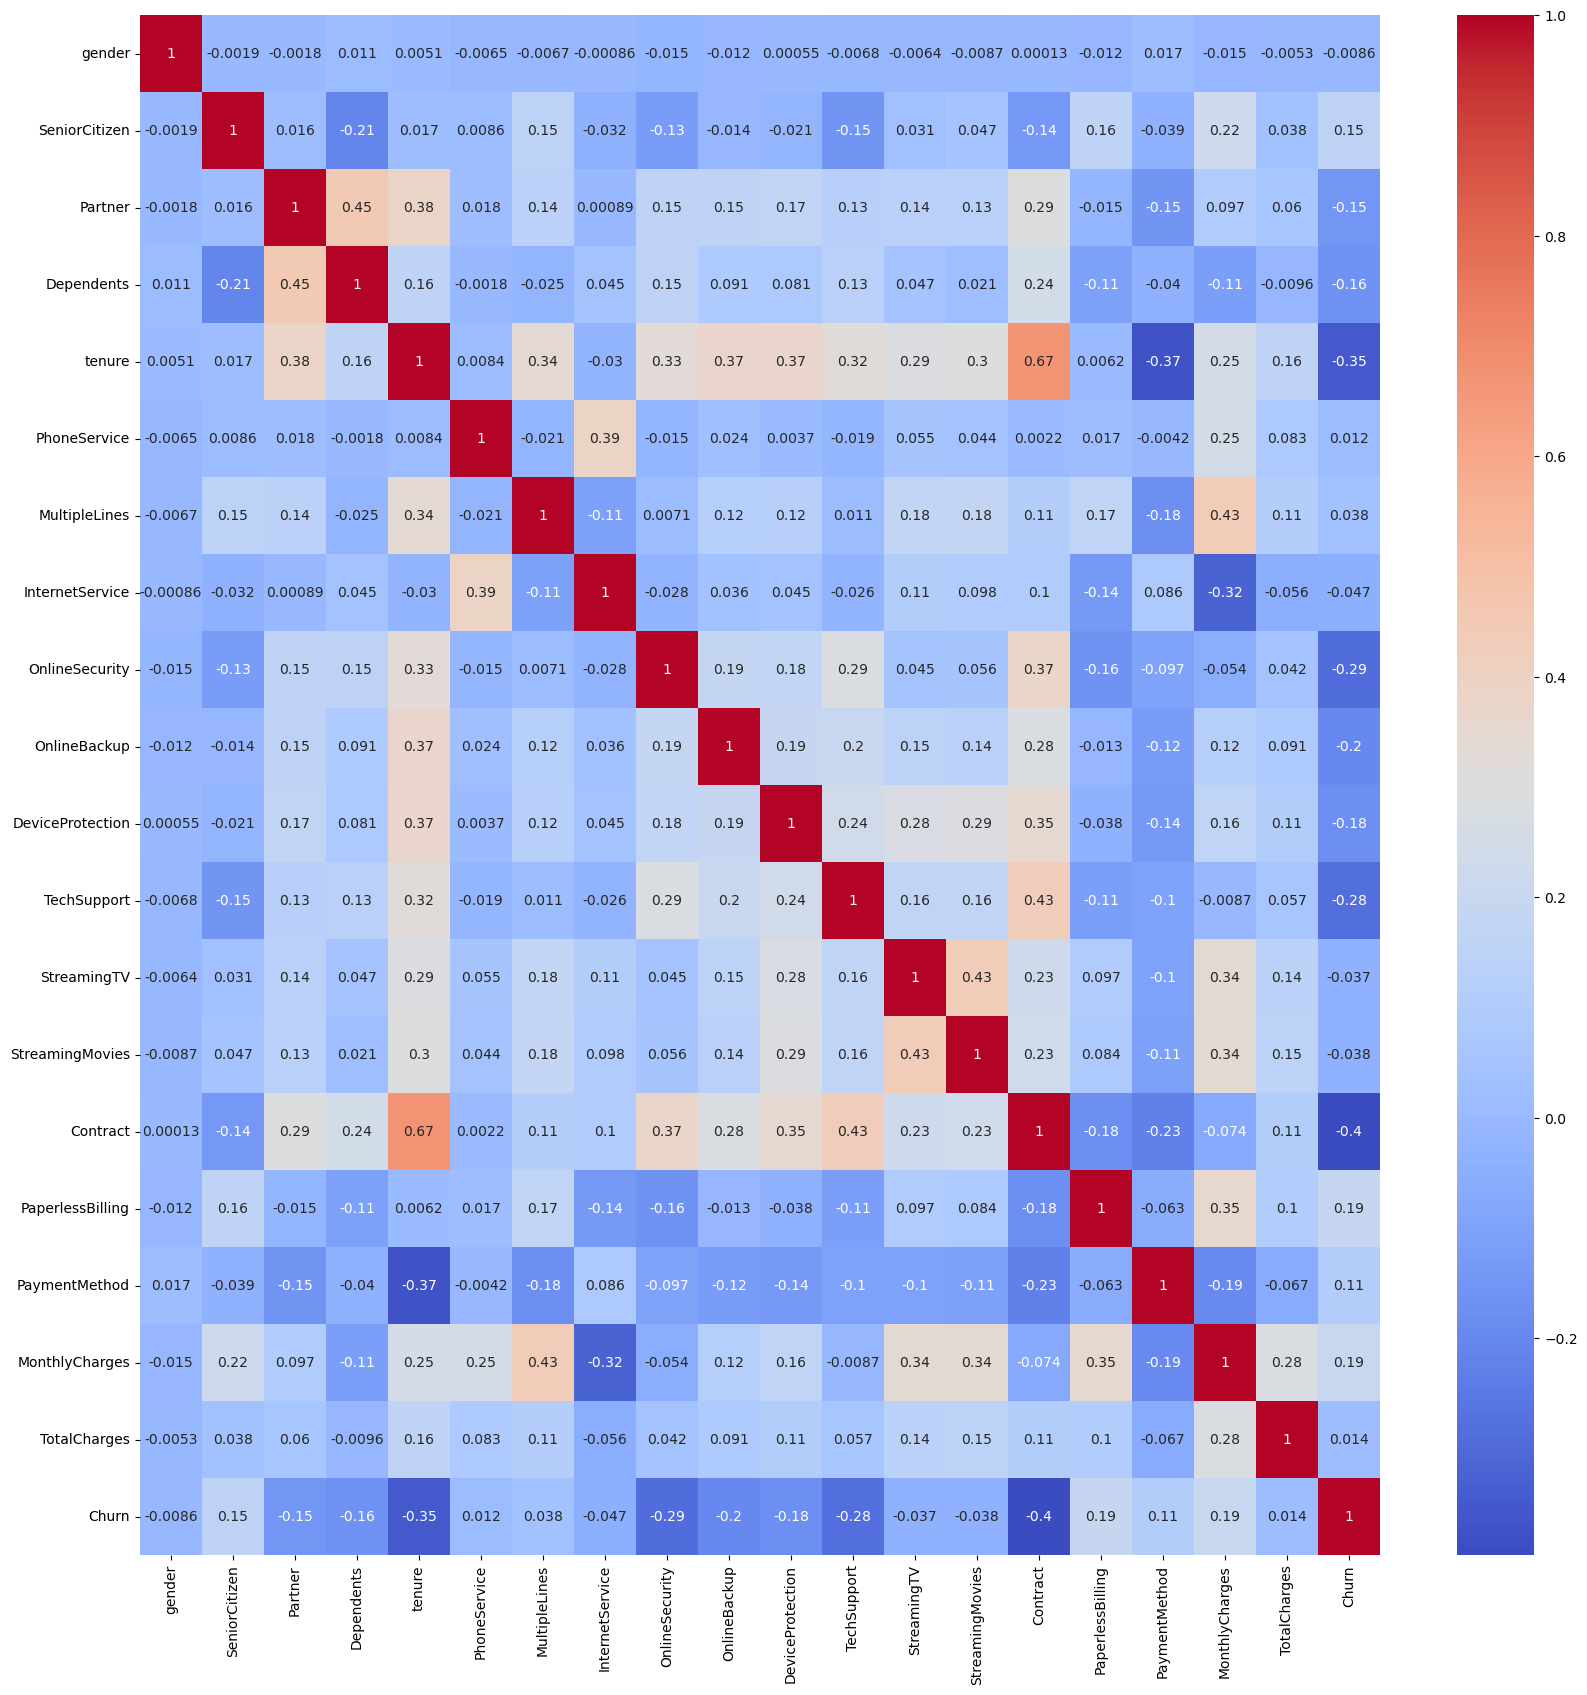

In [22]:
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns
categorical_cols = dataset.select_dtypes(include=['object']).columns

# Apply Label Encoding to each categorical column
for col in categorical_cols:
    dataset[col] = LabelEncoder().fit_transform(dataset[col])

# Now calculate correlation and plot heatmap
correlation_matrix = dataset.corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.show()


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [25]:
x = dataset.drop('Churn', axis=1) #Target Column
y = dataset['Churn']

In [26]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 42)

In [27]:
model = RandomForestClassifier(random_state=42)

In [28]:
model.fit(x_train,y_train) #TRAIN THE MODEL

RandomForestClassifier(random_state=42)

In [29]:
y_pd = model.predict(x_test) #prediction

In [30]:
ac = accuracy_score(y_test, y_pd)

In [34]:
cr = classification_report(y_test, y_pd)

In [37]:
cm = confusion_matrix(y_test,y_pd)

In [39]:
from sklearn.model_selection import GridSearchCV #Hyperparameter Tuning with GridSearchCV

In [43]:
param_grid = {
    'n_estimators': [100,200],
    'max_depth': [10,20, None],
    'min_samples_split': [2,5],
    'min_samples_leaf': [1,2]
}
gs = GridSearchCV(RandomForestClassifier(random_state = 42), param_grid, cv = 5, n_jobs= -1)


In [48]:
gs.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, None],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]})

In [49]:
gs.best_params_

{'max_depth': 10,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 100}

In [50]:
best_model = gs.best_estimator_

In [51]:
y_pd1 = best_model.predict(x_test)

In [52]:
y_pd1

array([1, 0, 0, ..., 0, 0, 1])

In [53]:
ac1 = accuracy_score(y_test, y_pd1)

In [54]:
cr1 = classification_report(y_test,y_pd1)

In [56]:
from sklearn.linear_model import LogisticRegression # LOGISTIC REGRESSION

In [57]:
model1 = LogisticRegression(random_state=42)

In [58]:
model1.fit(x_train,y_train)

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [59]:
y_pd2 = model.predict(x_test)

In [60]:
ac2 = accuracy_score(y_test,y_pd2)

In [62]:
from sklearn.svm import SVC #SUPPORT VECTOR MACHINE

In [63]:
model2 = SVC(random_state = 42)

In [64]:
model2.fit(x_train,y_train)

SVC(random_state=42)

In [65]:
y_pd2 = model.predict(x_test)

In [66]:
ac3 = accuracy_score(y_test,y_pd2)

In [68]:
from sklearn.metrics import roc_curve, roc_auc_score

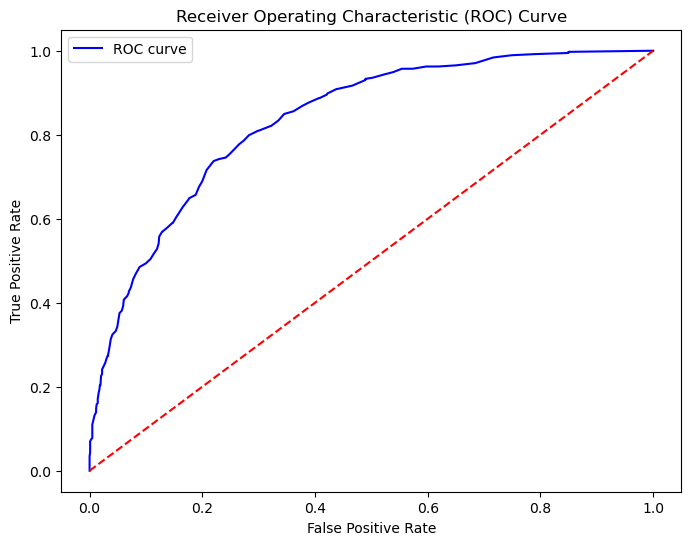

0.8347881105924002

In [69]:
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:,1])
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='b', label='ROC curve')
plt.plot([0,1],[0,1], color='r', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc = 'best')
plt.show()

#AUC SCORE
roc_auc_score(y_test, model.predict_proba(x_test)[:,1])


In [71]:
#CROSS-VALIDATION
from sklearn.model_selection import cross_val_score

In [72]:
scores = cross_val_score(model, x , y, cv=5, scoring='accuracy')

In [73]:
scores

array([0.79559972, 0.79347055, 0.77288857, 0.79758523, 0.80042614])

In [74]:
scores.mean()

0.7919940399380605

In [76]:
#XGBOOST
import xgboost as xgb

In [77]:
mdl = xgb.XGBClassifier(random_state = 42)

In [78]:
mdl.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [79]:
y_pred = model.predict(x_test)

In [80]:
acs = accuracy_score(y_test, y_pred)

In [82]:
#FEATURE IMPORTANCE
feature_importances = model.feature_importances_
feature_names = x.columns
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by = 'Importance', ascending=False)


In [83]:
importance_df

,Feature,Importance
17,MonthlyCharges,0.176539
4,tenure,0.174955
18,TotalCharges,0.167721
14,Contract,0.081976
16,PaymentMethod,0.051153
8,OnlineSecurity,0.048006
11,TechSupport,0.043074
9,OnlineBackup,0.027847
0,gender,0.027486
15,PaperlessBilling,0.026085


In [85]:
import shap #SHAPLEY ADDITIVE EXPLANATION

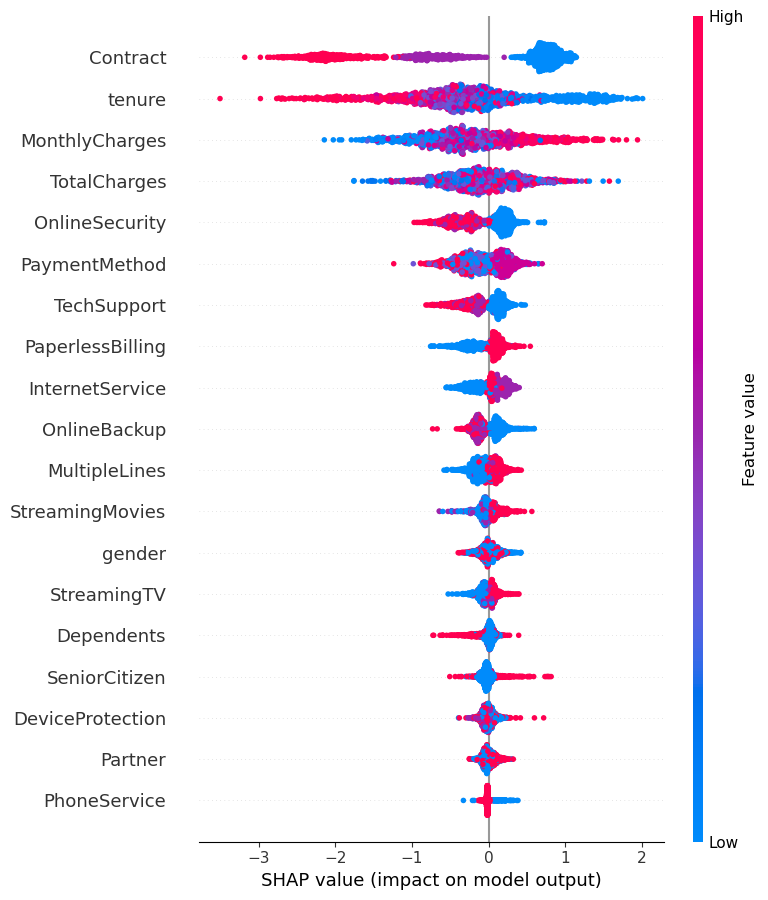

In [86]:
explainer = shap.TreeExplainer(mdl)
shap_values = explainer.shap_values(x_test)
shap.summary_plot(shap_values, x_test)

MODEL DEPLOYMENT

In [88]:
from flask import Flask, request, jsonify
import joblib
import pandas as pd

# Initialize Flask app
app = Flask(__name__)

# Load the saved model
model = joblib.load('customer_churn_model.pkl')

# Define a route for predictions
@app.route('/predict', methods=['POST'])
def predict():
    try:
        # Get input data from JSON request
        data = request.get_json()
        input_data = pd.DataFrame(data)  # Convert JSON to DataFrame
        # Make prediction
        prediction = model.predict(input_data)
        # Return predictions as JSON
        return jsonify({'prediction': prediction.tolist()})
    except Exception as e:
        return jsonify({'error': str(e)})

# Run the Flask app
if __name__ == '__main__':
    app.run(debug=True, use_reloader = False)


FileNotFoundError: [Errno 2] No such file or directory: 'customer_churn_model.pkl'